In [1]:
# -*- coding: utf-8 -*-
"""
@author: Xin
#calcuate fields PDF  Jupyter version
"""
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
h5file = h5py.File('conver.h5','r')
%matplotlib inline

In [2]:
#specify rerun_tag
istep='174000'
#normalize parameters
norm_const = 1.0/0.2874
large_label = '$\overline {S}_{ij}\overline{B}_i\overline{B}_j$'
small_label = '${S}_{ij}{B}_i{B}_j-\overline {S}_{ij}\overline{B}_i\overline{B}_j$'

In [3]:
#init function
def init(istep, norm_const):
    
    delimiter = ''
  #  mylist = ['Fields/','P60converion','/',istep]
  #  filepath = delimiter.join(mylist)
  #  databk = h5file.get(filepath)
  #  large_data = np.array(databk)*norm_const

    mylist = ['diff/','P','/',istep]
    filepath = delimiter.join(mylist)
    databk = h5file.get(filepath)
    small_data = np.array(databk)*norm_const

   # return large_data#, small_data
    return small_data

In [4]:
sdata = init(istep, norm_const)

In [ ]:
#visulize flow
def visuliz(istep, data, scale):
  
    data_2d = data[:,:,0]
    plt.figure(1, figsize = (2.6,2.6), dpi=600)
    plt.rc('font', family='Helvetica', size=3)
    plt.imshow(data_2d, origin='none', aspect=1,
               cmap='coolwarm',vmin=-scale,vmax=scale)
    plt.colorbar()
    plt.tight_layout()
    plt.axis('off')
    plt.savefig('vis.pdf', bbox_inches='tight')
    plt.show()
    plt.clf()

In [7]:
#plot PDF
def hist(data, xlabel):    
    
    data = data.flatten()
    plt.hist(data, bins=500, normed='True',histtype='step', log='True')  
    plt.ylim((1E-8, 1))
    plt.xlim((-1000, 1000))
    plt.xlabel(xlabel, fontsize=10, color='black', fontname="Helvetica")
  
    mean = 0.0909962093366
    standard_deviation = np.sqrt(460.024288608)

    # Plot between -10 and 10 with .001 steps.
    range = np.arange(-1000, 1000, 0.001)
    plt.xticks(np.arange(-1000,1500, 500))
    plt.yticks([10E-8, 10E-4, 1])
    # Mean = 0, SD = 1.
    plt.plot(range, norm.pdf(range, mean, standard_deviation),'--')
    
    fig = plt.gcf()
    fig.set_size_inches(2.6, 2.6)
    plt.tight_layout()
#    mean = np.around(np.mean(data), decimals=2)
#    plt.axvline(x=np.mean(data),color='r')
 #   ax = fig.add_subplot(111)
 #   ax.annotate('mean\n='+str(mean), xy=(mean, 1), xytext=(mean+20, 0.5),
 #           arrowprops=dict(arrowstyle="->"))

    delimiter = ''
    titlelist = ['pdf.eps']
    title=delimiter.join(titlelist)
    plt.savefig(title, format='eps', dpi=600)
    
    
    plt.show()
    plt.clf()

In [ ]:
def statistics(data):
    
    data = data.flatten()
    mean = np.mean(data)
    var = np.var(data)
    skew = ss.skew(data)
    
    return mean, var, skew

/software/intel/2017/intelpython27/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'Helvetica'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


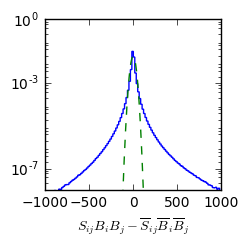

In [8]:
hist(sdata, small_label)

In [ ]:
h5file.close()

In [ ]:
10E-4

In [5]:
np.arange(-200,300, 100)

array([-200, -100,    0,  100,  200])

In [6]:
np.arange(-1000,1500, 500)

array([-1000,  -500,     0,   500,  1000])